## Setting up PySpark in Google Colab

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
!wget -q https://downloads.apache.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz

In [3]:
!tar -xvf spark-2.4.7-bin-hadoop2.7.tgz

spark-2.4.7-bin-hadoop2.7/
spark-2.4.7-bin-hadoop2.7/kubernetes/
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/Dockerfile
spark-2.4.7-bin-hadoop2.7/NOTICE
spark-2.4.7-bin-hadoop2.7/data/
spark-2.4.7-bin-hadoop2.7/data/strea

### Installing Pyspark

In [4]:
!pip install -q findspark

### Loading environment

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

In [6]:
import findspark

findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
import pyspark.sql.functions as F

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

import warnings
def ignore_warn(*args, **kwagrs):
    pass
warnings.warn = ignore_warn

### Mounting the Drive

In [8]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### Reading DataSet

In [9]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('diabetic').getOrCreate()
path = 'gdrive/MyDrive/HealthCareBigData/diabetic_data.csv'
df = spark.read.csv(path, header = True, inferSchema = True, nullValue="?")
df2 = df
df.printSchema()

root
 |-- encounter_id: integer (nullable = true)
 |-- patient_nbr: integer (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: string (nullable = true)
 |-- weight: string (nullable = true)
 |-- admission_type_id: integer (nullable = true)
 |-- discharge_disposition_id: integer (nullable = true)
 |-- admission_source_id: integer (nullable = true)
 |-- time_in_hospital: integer (nullable = true)
 |-- payer_code: string (nullable = true)
 |-- medical_specialty: string (nullable = true)
 |-- num_lab_procedures: integer (nullable = true)
 |-- num_procedures: integer (nullable = true)
 |-- num_medications: integer (nullable = true)
 |-- number_outpatient: integer (nullable = true)
 |-- number_emergency: integer (nullable = true)
 |-- number_inpatient: integer (nullable = true)
 |-- diag_1: string (nullable = true)
 |-- diag_2: string (nullable = true)
 |-- diag_3: string (nullable = true)
 |-- number_diagnoses: integer (nullable = true)
 |-

### Lets have a view on the Dataset


In [10]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,None,None,None,None,None
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [11]:
type(df)

pyspark.sql.dataframe.DataFrame

In [12]:
df.count()

101766

In [13]:
df.dtypes

[('encounter_id', 'int'),
 ('patient_nbr', 'int'),
 ('race', 'string'),
 ('gender', 'string'),
 ('age', 'string'),
 ('weight', 'string'),
 ('admission_type_id', 'int'),
 ('discharge_disposition_id', 'int'),
 ('admission_source_id', 'int'),
 ('time_in_hospital', 'int'),
 ('payer_code', 'string'),
 ('medical_specialty', 'string'),
 ('num_lab_procedures', 'int'),
 ('num_procedures', 'int'),
 ('num_medications', 'int'),
 ('number_outpatient', 'int'),
 ('number_emergency', 'int'),
 ('number_inpatient', 'int'),
 ('diag_1', 'string'),
 ('diag_2', 'string'),
 ('diag_3', 'string'),
 ('number_diagnoses', 'int'),
 ('max_glu_serum', 'string'),
 ('A1Cresult', 'string'),
 ('metformin', 'string'),
 ('repaglinide', 'string'),
 ('nateglinide', 'string'),
 ('chlorpropamide', 'string'),
 ('glimepiride', 'string'),
 ('acetohexamide', 'string'),
 ('glipizide', 'string'),
 ('glyburide', 'string'),
 ('tolbutamide', 'string'),
 ('pioglitazone', 'string'),
 ('rosiglitazone', 'string'),
 ('acarbose', 'string'),

# Data Cleaning

### Most missing data at columns (indicated by ?): Weight, Payer Code, and Medical Speciality

In [14]:
# counting null values
df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).first().asDict()

{'A1Cresult': 0,
 'acarbose': 0,
 'acetohexamide': 0,
 'admission_source_id': 0,
 'admission_type_id': 0,
 'age': 0,
 'change': 0,
 'chlorpropamide': 0,
 'citoglipton': 0,
 'diabetesMed': 0,
 'diag_1': 21,
 'diag_2': 358,
 'diag_3': 1423,
 'discharge_disposition_id': 0,
 'encounter_id': 0,
 'examide': 0,
 'gender': 0,
 'glimepiride': 0,
 'glimepiride-pioglitazone': 0,
 'glipizide': 0,
 'glipizide-metformin': 0,
 'glyburide': 0,
 'glyburide-metformin': 0,
 'insulin': 0,
 'max_glu_serum': 0,
 'medical_specialty': 49949,
 'metformin': 0,
 'metformin-pioglitazone': 0,
 'metformin-rosiglitazone': 0,
 'miglitol': 0,
 'nateglinide': 0,
 'num_lab_procedures': 0,
 'num_medications': 0,
 'num_procedures': 0,
 'number_diagnoses': 0,
 'number_emergency': 0,
 'number_inpatient': 0,
 'number_outpatient': 0,
 'patient_nbr': 0,
 'payer_code': 40256,
 'pioglitazone': 0,
 'race': 2273,
 'readmitted': 0,
 'repaglinide': 0,
 'rosiglitazone': 0,
 'time_in_hospital': 0,
 'tolazamide': 0,
 'tolbutamide': 0,


### drop the columns

In [15]:
df = df.drop(df.weight)
df = df.drop(df.payer_code)
df = df.drop(df.medical_specialty)

In [16]:
df = df.dropna()

### counting null values again

In [17]:
df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).first().asDict()

{'A1Cresult': 0,
 'acarbose': 0,
 'acetohexamide': 0,
 'admission_source_id': 0,
 'admission_type_id': 0,
 'age': 0,
 'change': 0,
 'chlorpropamide': 0,
 'citoglipton': 0,
 'diabetesMed': 0,
 'diag_1': 0,
 'diag_2': 0,
 'diag_3': 0,
 'discharge_disposition_id': 0,
 'encounter_id': 0,
 'examide': 0,
 'gender': 0,
 'glimepiride': 0,
 'glimepiride-pioglitazone': 0,
 'glipizide': 0,
 'glipizide-metformin': 0,
 'glyburide': 0,
 'glyburide-metformin': 0,
 'insulin': 0,
 'max_glu_serum': 0,
 'metformin': 0,
 'metformin-pioglitazone': 0,
 'metformin-rosiglitazone': 0,
 'miglitol': 0,
 'nateglinide': 0,
 'num_lab_procedures': 0,
 'num_medications': 0,
 'num_procedures': 0,
 'number_diagnoses': 0,
 'number_emergency': 0,
 'number_inpatient': 0,
 'number_outpatient': 0,
 'patient_nbr': 0,
 'pioglitazone': 0,
 'race': 0,
 'readmitted': 0,
 'repaglinide': 0,
 'rosiglitazone': 0,
 'time_in_hospital': 0,
 'tolazamide': 0,
 'tolbutamide': 0,
 'troglitazone': 0}

In [18]:
df.count()

98053

### drop the columns with IDs

In [19]:
df = df.drop(df.encounter_id)
df = df.drop(df.patient_nbr)
df = df.drop(df.admission_type_id)
df = df.drop(df.discharge_disposition_id)
df = df.drop(df.admission_source_id)


### Convert string/categorical values into integers
These string columns will be encoded


In [20]:
string_columns = [column for column in df.columns if df.schema[column].jsonValue().get('type') == 'string']
string_columns.remove('readmitted')
string_columns.remove('diag_1')
string_columns.remove('diag_2')
string_columns.remove('diag_3')
string_columns

['race',
 'gender',
 'age',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

### The readmitted column should be of numeric type

In [21]:
numeric_columns = [column for column in df.columns if df.schema[column].jsonValue().get('type') == 'integer']
numeric_columns

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [22]:
for col in string_columns:
    for val in df.select(col).distinct().collect():
        df = df.withColumn(col + '_' + val[0], F.when(val[0] == df[col], 1).otherwise(0))

In [23]:
for col in string_columns:
    df = df.drop(df[col])

In [24]:
df.printSchema()

root
 |-- time_in_hospital: integer (nullable = true)
 |-- num_lab_procedures: integer (nullable = true)
 |-- num_procedures: integer (nullable = true)
 |-- num_medications: integer (nullable = true)
 |-- number_outpatient: integer (nullable = true)
 |-- number_emergency: integer (nullable = true)
 |-- number_inpatient: integer (nullable = true)
 |-- diag_1: string (nullable = true)
 |-- diag_2: string (nullable = true)
 |-- diag_3: string (nullable = true)
 |-- number_diagnoses: integer (nullable = true)
 |-- readmitted: string (nullable = true)
 |-- race_Caucasian: integer (nullable = false)
 |-- race_Other: integer (nullable = false)
 |-- race_AfricanAmerican: integer (nullable = false)
 |-- race_Hispanic: integer (nullable = false)
 |-- race_Asian: integer (nullable = false)
 |-- gender_Female: integer (nullable = false)
 |-- gender_Unknown/Invalid: integer (nullable = false)
 |-- gender_Male: integer (nullable = false)
 |-- age_[70-80): integer (nullable = false)
 |-- age_[90-100)

### diag_1, diag_2, diag_3 have many unique values which greatly increase the size of dataset so we take only those values of these variables which occur more than 2500 times in the dataset

####  for diag_1

In [25]:
diag1_dataset = df.select("diag_1").groupBy("diag_1").count().filter('count > 2500')

In [26]:
diag1_dataset.collect()

[Row(diag_1='428', count=6730),
 Row(diag_1='786', count=3900),
 Row(diag_1='410', count=3514),
 Row(diag_1='486', count=3412),
 Row(diag_1='414', count=6374),
 Row(diag_1='427', count=2701)]

In [27]:
for val in diag1_dataset.collect():
    df = df.withColumn('diag_1' + '_' + val[0], F.when(val[0] == df['diag_1'], 1).otherwise(0))

In [28]:
df = df.drop(df['diag_1'])

####  for diag_2

In [29]:
# for diag_2
diag2_dataset = df.select("diag_2").groupBy("diag_2").count().filter('count > 2500')

In [30]:
for val in diag2_dataset.collect():
    df = df.withColumn('diag_2' + '_' + val[0], F.when(val[0] == df['diag_2'], 1).otherwise(0))

In [31]:
df = df.drop(df['diag_2'])

####  for diag_3

In [32]:
diag3_dataset = df.select("diag_3").groupBy("diag_3").count().filter('count > 2500')

In [33]:
for val in diag3_dataset.collect():
    df = df.withColumn('diag_3' + '_' + val[0], F.when(val[0] == df['diag_3'], 1).otherwise(0))

In [34]:
df = df.drop(df['diag_3'])

In [35]:
df.printSchema()

root
 |-- time_in_hospital: integer (nullable = true)
 |-- num_lab_procedures: integer (nullable = true)
 |-- num_procedures: integer (nullable = true)
 |-- num_medications: integer (nullable = true)
 |-- number_outpatient: integer (nullable = true)
 |-- number_emergency: integer (nullable = true)
 |-- number_inpatient: integer (nullable = true)
 |-- number_diagnoses: integer (nullable = true)
 |-- readmitted: string (nullable = true)
 |-- race_Caucasian: integer (nullable = false)
 |-- race_Other: integer (nullable = false)
 |-- race_AfricanAmerican: integer (nullable = false)
 |-- race_Hispanic: integer (nullable = false)
 |-- race_Asian: integer (nullable = false)
 |-- gender_Female: integer (nullable = false)
 |-- gender_Unknown/Invalid: integer (nullable = false)
 |-- gender_Male: integer (nullable = false)
 |-- age_[70-80): integer (nullable = false)
 |-- age_[90-100): integer (nullable = false)
 |-- age_[40-50): integer (nullable = false)
 |-- age_[10-20): integer (nullable = fa

### Now for the Readmitted column

In [36]:
df = df.withColumn("readmitted", F.when(df["readmitted"] == "NO", 0).otherwise(1))

In [37]:
df = df.withColumnRenamed('age_[70-80)', 'age_[70-80]')
df = df.withColumnRenamed('age_[90-100)', 'age_[90-100]')
df = df.withColumnRenamed('age_[40-50)', 'age_[40-50]')
df = df.withColumnRenamed('age_[10-20)', 'age_[10-20]')
df = df.withColumnRenamed('age_[20-30)', 'age_[20-30]')
df = df.withColumnRenamed('age_[30-40)', 'age_[30-40]')
df = df.withColumnRenamed('age_[0-10)', 'age_[0-10]')
df = df.withColumnRenamed('age_[80-90)', 'age_[80-90]')
df = df.withColumnRenamed('age_[50-60)', 'age_[50-60]')
df = df.withColumnRenamed('age_[60-70)', 'age_[60-70]')

### Now the Data is Clean

In [38]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31
num_procedures,0,5,1,0,6
num_medications,18,13,16,8,16
number_outpatient,0,2,0,0,0
...,...,...,...,...,...
diag_3_276,0,0,0,0,0
diag_3_401,0,0,0,0,0
diag_3_496,0,0,0,0,0
diag_3_414,0,0,0,0,0


## Visualization

### We can see data is almost balanced

In [39]:
df.groupby('readmitted').count().toPandas()

,readmitted,count
0,1,45715
1,0,52338


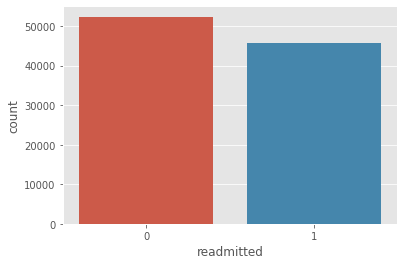

In [40]:
sns.countplot('readmitted', data=pd.DataFrame(df.take(98053),columns = df.columns))
plt.show()

In [41]:
dff = pd.read_csv(path)

In [42]:
for i in range(24,47): #No-0,Down-1,Up-2,Steady-3
    dff[dff.columns[i]] = dff[dff.columns[i]].map({'No': -2, 'Down': -1, "Up":1, 'Steady':0})
dff['readmitted'] = dff['readmitted'].map({'NO': 0, '<30': 1, ">30":2})
dff['readmittedbinary'] = dff['readmitted'].map({0: 0, 1: 1, 2:1})
dff['change'] = dff['change'].map({'No': -1, 'Ch': 1})#No-0,Ch-1
dff['max_glu_serum'] = dff['max_glu_serum'].map({'None': 0, '>200': 2,'>300':3,'Norm':1})
dff['A1Cresult'] = dff['A1Cresult'].map({'None': 0, '>7': 7,'>8':8,'Norm':5})
dff['diabetesMed'] = dff['diabetesMed'].map({'No': -1, 'Yes': 1})
dff['age'] = dff['age'].map({'[0-10)':5,'[10-20)':15, '[20-30)':25,'[30-40)':35,'[40-50)':45,'[50-60)':55,'[60-70)':65,'[70-80)':75,'[80-90)':85,'[90-100)':95})
dff.drop(['encounter_id','patient_nbr','weight','admission_type_id','discharge_disposition_id','admission_source_id','medical_specialty','payer_code'],axis=1,inplace=True)
dff=dff.loc[dff['gender'].isin(['Male','Female'])]
dff.replace('?', np.nan, inplace = True)
dff= dff.dropna()


### Caucasians and AfricanAmerican are the one who Mostly suffers with Diabetes

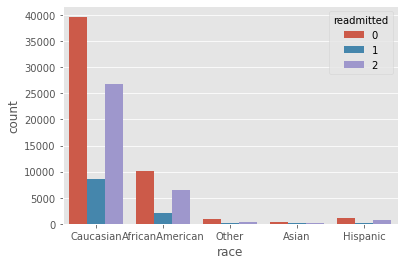

In [43]:
c = sns.countplot(x = dff['race'], hue= dff['readmitted'])


Here we can see Higer the Persons age , Higher is the chance to get Diabetes

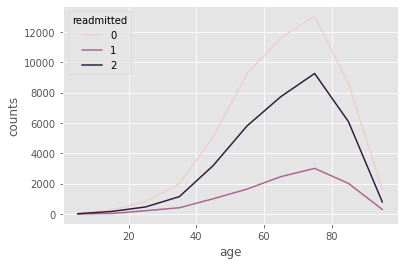

In [44]:
count_of_y = dff["age"].groupby(dff["readmitted"]).value_counts().rename("counts").reset_index()
fig = sns.lineplot(x="age", y="counts", hue="readmitted", data=count_of_y)

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

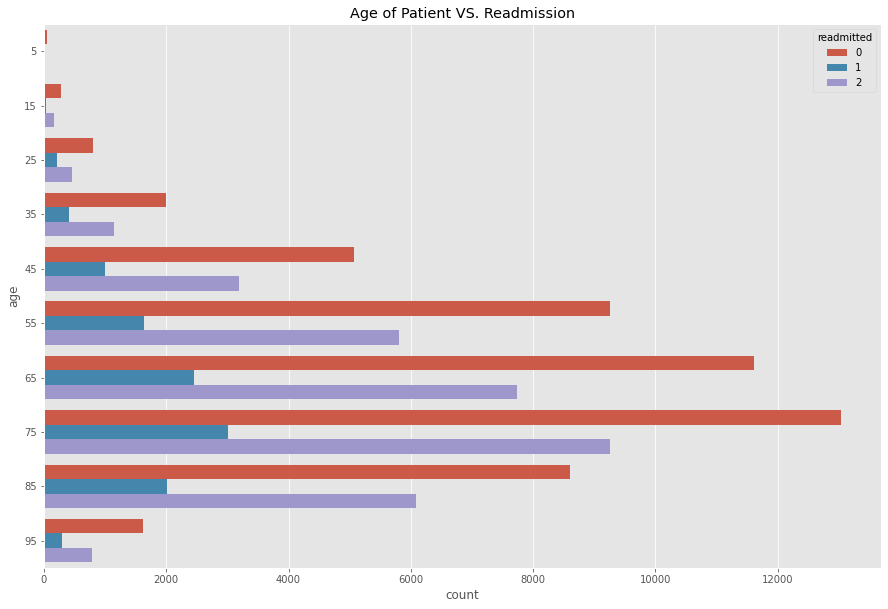

In [45]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= dff['age'], hue = dff['readmitted']).set_title('Age of Patient VS. Readmission')

## Correlation Plot
Below we can see that there is very less Correlation Among the Features

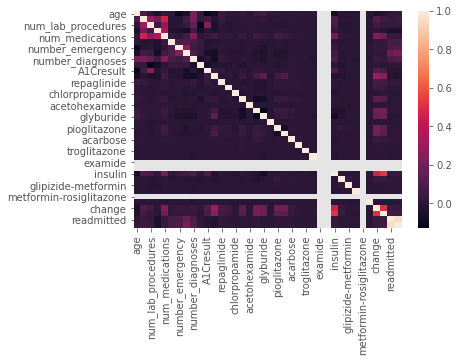

In [46]:
sns.heatmap(dff.corr())

### We can Se here that in Some Cases if the Patient Spends more time in Hospital, has more chance to be Readmitted

Red: Readmitted
Blue: Not Readmitted


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

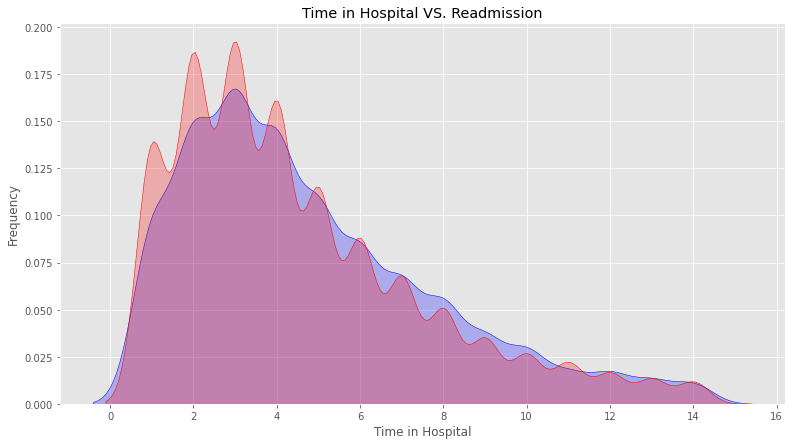

In [47]:
import matplotlib.patches as mpatches
print("Red: Readmitted")
print("Blue: Not Readmitted")
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(dff.loc[(dff['readmitted'] == 1),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(dff.loc[(dff['readmitted'] == 2),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
red_patch = mpatches.Patch(color='red', label='Readmitted',)
blue_patch = mpatches.Patch(color='blue', label='Not Readmitted',)
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

### Number of Medications are almost Same for all

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

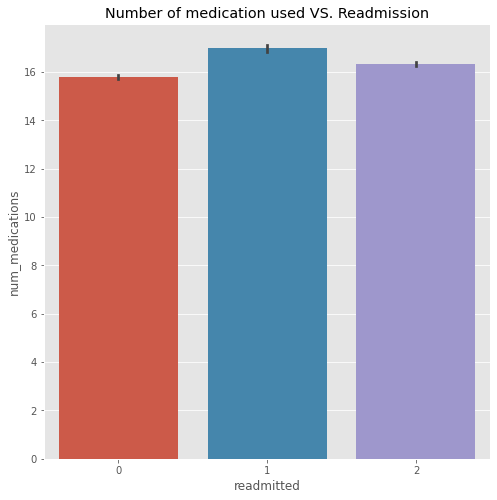

In [48]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = dff['readmitted'], y = dff['num_medications']).set_title("Number of medication used VS. Readmission")

#### Below We can see that females are the more wo suffers with Diabetes and gets Readmitted

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

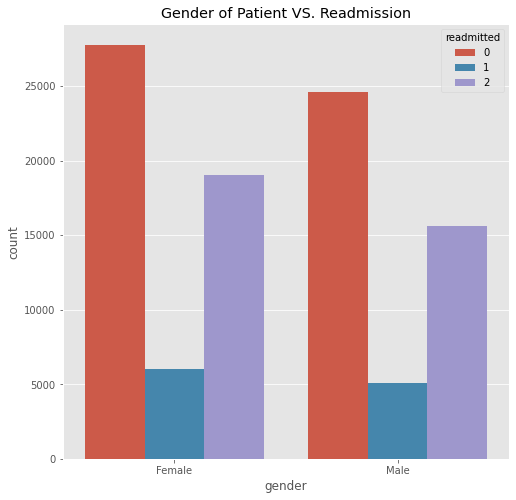

In [49]:
fig = plt.figure(figsize=(8,8))
sns.countplot(dff['gender'], hue = dff['readmitted']).set_title("Gender of Patient VS. Readmission")

### Change is Medication doesn't gives a clear indication about Readmission

Text(0.5, 1.0, 'Change of Medication VS. Readmission')

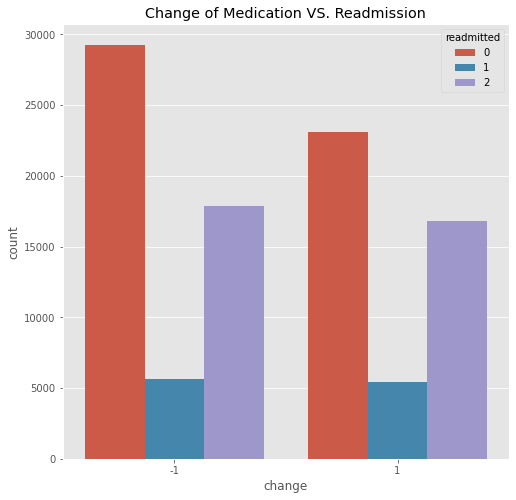

In [50]:
fig = plt.figure(figsize=(8,8))
sns.countplot(dff['change'], hue = dff['readmitted']).set_title('Change of Medication VS. Readmission')

### Below we can see that, If the patient is prescribed some Medication still he has to visit or in most of the cases Patients are Readmitted

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

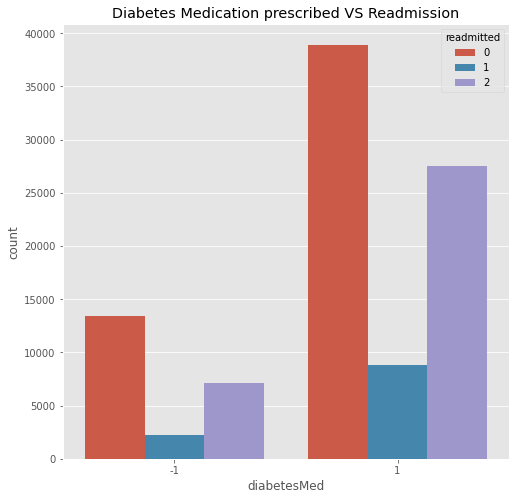

In [51]:
fig = plt.figure(figsize=(8,8))
sns.countplot(dff['diabetesMed'], hue = dff['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

### Below we can see that Number of Lab Procedures are Same for All the Patients

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

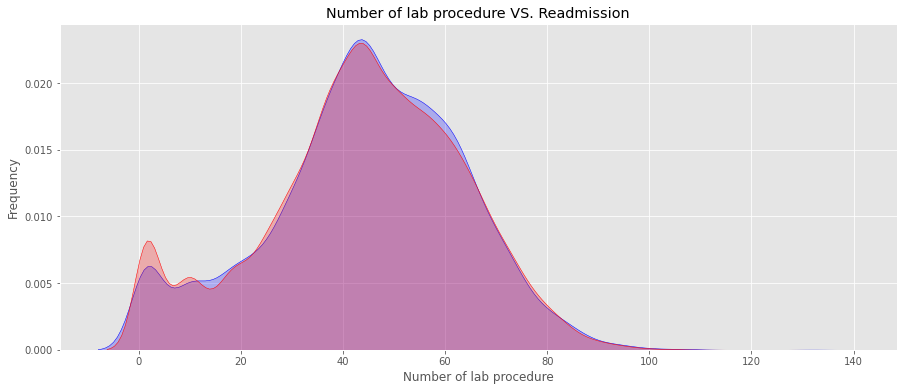

In [52]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(dff.loc[(dff['readmitted'] == 1),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(dff.loc[(dff['readmitted'] == 2),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

## Model Building

In [53]:
rawData = df2.drop('encounter_id', 'patient_nbr')

from pyspark.sql.types import *
field_names = rawData.columns
fields = [StructField(field_name, StringType(), True) for field_name in field_names]
rddWithoutQues = rawData.rdd.map(lambda x: [None if string == "?" else string for string in x])
schema = StructType(fields)
diabetes = spark.createDataFrame(rddWithoutQues, schema)
diabetes.take(1)

[Row(race='Caucasian', gender='Female', age='[0-10)', weight=None, admission_type_id='6', discharge_disposition_id='25', admission_source_id='1', time_in_hospital='1', payer_code=None, medical_specialty='Pediatrics-Endocrinology', num_lab_procedures='41', num_procedures='0', num_medications='1', number_outpatient='0', number_emergency='0', number_inpatient='0', diag_1='250.83', diag_2=None, diag_3=None, number_diagnoses='1', max_glu_serum='None', A1Cresult='None', metformin='No', repaglinide='No', nateglinide='No', chlorpropamide='No', glimepiride='No', acetohexamide='No', glipizide='No', glyburide='No', tolbutamide='No', pioglitazone='No', rosiglitazone='No', acarbose='No', miglitol='No', troglitazone='No', tolazamide='No', examide='No', citoglipton='No', insulin='No', glyburide-metformin='No', glipizide-metformin='No', glimepiride-pioglitazone='No', metformin-rosiglitazone='No', metformin-pioglitazone='No', change='No', diabetesMed='No', readmitted='NO')]

In [54]:

from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

def modify_values(r):
    if r == ">30" or r =="<30":
        return "Yes"
    else:
        return "No"
ol_val = udf(modify_values, StringType())
diabetes = diabetes.withColumn("readmitted",ol_val(diabetes.readmitted))
diabetes.take(1)

[Row(race='Caucasian', gender='Female', age='[0-10)', weight=None, admission_type_id='6', discharge_disposition_id='25', admission_source_id='1', time_in_hospital='1', payer_code=None, medical_specialty='Pediatrics-Endocrinology', num_lab_procedures='41', num_procedures='0', num_medications='1', number_outpatient='0', number_emergency='0', number_inpatient='0', diag_1='250.83', diag_2=None, diag_3=None, number_diagnoses='1', max_glu_serum='None', A1Cresult='None', metformin='No', repaglinide='No', nateglinide='No', chlorpropamide='No', glimepiride='No', acetohexamide='No', glipizide='No', glyburide='No', tolbutamide='No', pioglitazone='No', rosiglitazone='No', acarbose='No', miglitol='No', troglitazone='No', tolazamide='No', examide='No', citoglipton='No', insulin='No', glyburide-metformin='No', glipizide-metformin='No', glimepiride-pioglitazone='No', metformin-rosiglitazone='No', metformin-pioglitazone='No', change='No', diabetesMed='No', readmitted='No')]

In [55]:
diabetes = diabetes.drop('weight', 'payer_code', 'medical_specialty')

In [56]:
diabetes = diabetes.withColumn("diag_2", diabetes["diag_2"].cast(DoubleType()))
diabetes = diabetes.withColumn("diag_3", diabetes["diag_3"].cast(DoubleType()))
diabetes = diabetes.withColumn("diag_1", diabetes["diag_1"].cast(DoubleType()))
diabetes = diabetes.withColumn("time_in_hospital", diabetes["time_in_hospital"].cast(DoubleType()))
diabetes = diabetes.withColumn("num_lab_procedures", diabetes["num_lab_procedures"].cast(DoubleType()))
diabetes = diabetes.withColumn("num_medications", diabetes["num_medications"].cast(DoubleType()))
diabetes = diabetes.withColumn("number_emergency", diabetes["number_emergency"].cast(DoubleType()))
diabetes = diabetes.withColumn("number_inpatient", diabetes["number_inpatient"].cast(DoubleType()))
diabetes = diabetes.withColumn("number_diagnoses", diabetes["number_diagnoses"].cast(DoubleType()))

# Dropping the remaining few NA rows
diabetes = diabetes.dropna()

In [57]:

# Redundant and unbalacned feature list imported from R
diabetes = diabetes.drop('examide', 'citoglipton', 'metformin-rosiglitazone', 'metformin-pioglitazone', 
         'glimepiride-pioglitazone', 'citoglipton, examide', 'acetohexamide',
    'repaglinide', 'nateglinide', 'chlorpropamide', 'tolbutamide', 'acarbose', 'miglitol',
         'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin')
diabetes

DataFrame[race: string, gender: string, age: string, admission_type_id: string, discharge_disposition_id: string, admission_source_id: string, time_in_hospital: double, num_lab_procedures: double, num_procedures: string, num_medications: double, number_outpatient: string, number_emergency: double, number_inpatient: double, diag_1: double, diag_2: double, diag_3: double, number_diagnoses: double, max_glu_serum: string, A1Cresult: string, metformin: string, glimepiride: string, glipizide: string, glyburide: string, pioglitazone: string, rosiglitazone: string, insulin: string, change: string, diabetesMed: string, readmitted: string]

### Preparing for modelling stage

In [58]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer# Creating a list of STRING dtype columns
cols_to_index_1 = [x[0] if x[1] == "string" else None for x in diabetes.dtypes]
cols_to_index = [x for x in cols_to_index_1 if x != None]

# Creating the indexers for each column
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index") for column in cols_to_index]
indexers_fitted = [ind.fit(diabetes) for ind in indexers]

# Passing it on to the Pipeline function
# Pipeline transforms our DF using "stages" 
pipeline = Pipeline(stages=indexers_fitted)
diabetes_indexed = pipeline.fit(diabetes).transform(diabetes)
diabetes_indexed

DataFrame[race: string, gender: string, age: string, admission_type_id: string, discharge_disposition_id: string, admission_source_id: string, time_in_hospital: double, num_lab_procedures: double, num_procedures: string, num_medications: double, number_outpatient: string, number_emergency: double, number_inpatient: double, diag_1: double, diag_2: double, diag_3: double, number_diagnoses: double, max_glu_serum: string, A1Cresult: string, metformin: string, glimepiride: string, glipizide: string, glyburide: string, pioglitazone: string, rosiglitazone: string, insulin: string, change: string, diabetesMed: string, readmitted: string, race_index: double, gender_index: double, age_index: double, admission_type_id_index: double, discharge_disposition_id_index: double, admission_source_id_index: double, num_procedures_index: double, number_outpatient_index: double, max_glu_serum_index: double, A1Cresult_index: double, metformin_index: double, glimepiride_index: double, glipizide_index: double,

In [59]:
diabetes_indexed = diabetes_indexed.drop('race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'num_procedures',
 'number_outpatient',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted')



In [60]:
diabetes_indexed = diabetes_indexed.withColumnRenamed("readmitted_index", "readmitted")

In [61]:
cols_to_index

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'num_procedures',
 'number_outpatient',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

### One Hot Encoding
- Creating a list of features to be OHE

In [62]:
cols_to_ohe = cols_to_index
cols_to_ohe.remove("readmitted")
cols_to_ohe_ = [col+"_index" for col in cols_to_ohe]
cols_to_ohe_

['race_index',
 'gender_index',
 'age_index',
 'admission_type_id_index',
 'discharge_disposition_id_index',
 'admission_source_id_index',
 'num_procedures_index',
 'number_outpatient_index',
 'max_glu_serum_index',
 'A1Cresult_index',
 'metformin_index',
 'glimepiride_index',
 'glipizide_index',
 'glyburide_index',
 'pioglitazone_index',
 'rosiglitazone_index',
 'insulin_index',
 'change_index',
 'diabetesMed_index']

In [63]:
output_ohe_cols = [x+"_vector" for x in cols_to_ohe_]

from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=cols_to_ohe_,
                                 outputCols=output_ohe_cols)

model_ohe = encoder.fit(diabetes_indexed)
diabetes_ohe = model_ohe.transform(diabetes_indexed)
diabetes_ohe.take(1)

[Row(time_in_hospital=3.0, num_lab_procedures=59.0, num_medications=18.0, number_emergency=0.0, number_inpatient=0.0, diag_1=276.0, diag_2=250.01, diag_3=255.0, number_diagnoses=9.0, race_index=0.0, gender_index=0.0, age_index=8.0, admission_type_id_index=0.0, discharge_disposition_id_index=0.0, admission_source_id_index=0.0, num_procedures_index=0.0, number_outpatient_index=0.0, max_glu_serum_index=0.0, A1Cresult_index=0.0, metformin_index=0.0, glimepiride_index=0.0, glipizide_index=0.0, glyburide_index=0.0, pioglitazone_index=0.0, rosiglitazone_index=0.0, insulin_index=3.0, change_index=1.0, diabetesMed_index=0.0, readmitted=1.0, metformin_index_vector=SparseVector(3, {0: 1.0}), admission_source_id_index_vector=SparseVector(15, {0: 1.0}), rosiglitazone_index_vector=SparseVector(3, {0: 1.0}), glimepiride_index_vector=SparseVector(3, {0: 1.0}), discharge_disposition_id_index_vector=SparseVector(25, {0: 1.0}), glipizide_index_vector=SparseVector(3, {0: 1.0}), max_glu_serum_index_vector=

In [64]:
diabetes_ohe = diabetes_ohe.drop('race_index',
 'gender_index',
 'age_index',
 'admission_type_id_index',
 'discharge_disposition_id_index',
 'admission_source_id_index',
 'num_procedures_index',
 'number_outpatient_index',
 'max_glu_serum_index',
 'A1Cresult_index',
 'metformin_index',
 'glimepiride_index',
 'glipizide_index',
 'glyburide_index',
 'pioglitazone_index',
 'rosiglitazone_index',
 'insulin_index',
 'change_index',
 'diabetesMed_index')
diabetes_ohe

DataFrame[time_in_hospital: double, num_lab_procedures: double, num_medications: double, number_emergency: double, number_inpatient: double, diag_1: double, diag_2: double, diag_3: double, number_diagnoses: double, readmitted: double, metformin_index_vector: vector, admission_source_id_index_vector: vector, rosiglitazone_index_vector: vector, glimepiride_index_vector: vector, discharge_disposition_id_index_vector: vector, glipizide_index_vector: vector, max_glu_serum_index_vector: vector, gender_index_vector: vector, number_outpatient_index_vector: vector, race_index_vector: vector, diabetesMed_index_vector: vector, admission_type_id_index_vector: vector, A1Cresult_index_vector: vector, change_index_vector: vector, glyburide_index_vector: vector, age_index_vector: vector, insulin_index_vector: vector, pioglitazone_index_vector: vector, num_procedures_index_vector: vector]

In [65]:
# The following code will take in all of these columns and convert it to 1 column named "features" which will store data of
# ALL features for 1 record (row)

from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=['time_in_hospital',
 'num_lab_procedures',
 'num_medications',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'metformin_index_vector',
 'admission_source_id_index_vector',
 'rosiglitazone_index_vector',
 'glimepiride_index_vector',
 'discharge_disposition_id_index_vector',
 'glipizide_index_vector',
 'max_glu_serum_index_vector',
 'gender_index_vector',
 'number_outpatient_index_vector',
 'race_index_vector',
 'diabetesMed_index_vector',
 'admission_type_id_index_vector',
 'A1Cresult_index_vector',
 'change_index_vector',
 'glyburide_index_vector',
 'age_index_vector',
 'insulin_index_vector',
 'pioglitazone_index_vector',
 'num_procedures_index_vector'],
    outputCol="features")

output = assembler.transform(diabetes_ohe)

output = output.drop('time_in_hospital',
 'num_lab_procedures',
 'num_medications',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'metformin_index_vector',
 'admission_source_id_index_vector',
 'rosiglitazone_index_vector',
 'glimepiride_index_vector',
 'discharge_disposition_id_index_vector',
 'glipizide_index_vector',
 'max_glu_serum_index_vector',
 'gender_index_vector',
 'number_outpatient_index_vector',
 'race_index_vector',
 'diabetesMed_index_vector',
 'admission_type_id_index_vector',
 'A1Cresult_index_vector',
 'change_index_vector',
 'glyburide_index_vector',
 'age_index_vector',
 'insulin_index_vector',
 'pioglitazone_index_vector',
 'num_procedures_index_vector')

output.show(5)


+----------+--------------------+
|readmitted|            features|
+----------+--------------------+
|       1.0|(144,[0,1,2,5,6,7...|
|       0.0|(144,[0,1,2,5,6,7...|
|       0.0|(144,[0,1,2,5,6,7...|
|       1.0|(144,[0,1,2,5,6,7...|
|       1.0|(144,[0,1,2,5,6,7...|
+----------+--------------------+
only showing top 5 rows



#### RANDOM FOREST

In [66]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

training, testing = output.randomSplit([0.8,0.2])
rf = RandomForestClassifier(numTrees=100, maxDepth=6, labelCol="readmitted", seed=42,
                           featureSubsetStrategy='onethird')
model = rf.fit(training)

predictions = model.transform(testing)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="readmitted", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(predictions)
print("Accuracy = %g" % accuracy)

Accuracy = 0.628925


In [67]:
pd.DataFrame(predictions.take(5), columns=predictions.columns).transpose()

,0,1,2,3,4
readmitted,0,0,0,0,0
features,"(1.0, 73.0, 18.0, 1.0, 1.0, 414.0, 411.0, 428....","(3.0, 68.0, 11.0, 1.0, 1.0, 250.1, 682.0, 459....","(1.0, 58.0, 9.0, 1.0, 1.0, 785.0, 411.0, 250.0...","(4.0, 63.0, 17.0, 1.0, 2.0, 518.0, 428.0, 425....","(1.0, 43.0, 6.0, 2.0, 1.0, 560.0, 276.0, 276.0..."
rawPrediction,"[38.34541639282579, 61.654583607174196]","[38.72874009036157, 61.27125990963842]","[39.41151983150862, 60.58848016849137]","[29.083848245312918, 70.91615175468705]","[38.22785117526562, 61.772148824734394]"
probability,"[0.38345416392825793, 0.6165458360717421]","[0.38728740090361574, 0.6127125990963842]","[0.3941151983150862, 0.6058848016849138]","[0.29083848245312927, 0.7091615175468707]","[0.38227851175265615, 0.6177214882473439]"
prediction,1,1,1,1,1


### FEATURE IMPORTANCES

In [68]:
model.featureImportances

SparseVector(144, {0: 0.004, 1: 0.0048, 2: 0.0136, 3: 0.1096, 4: 0.4867, 5: 0.0018, 6: 0.0018, 7: 0.0058, 8: 0.0672, 9: 0.0002, 10: 0.0003, 11: 0.0, 12: 0.018, 13: 0.0003, 14: 0.0002, 15: 0.0077, 16: 0.0038, 17: 0.0001, 18: 0.0003, 20: 0.0, 27: 0.0, 28: 0.0002, 30: 0.0002, 31: 0.0001, 32: 0.0, 33: 0.0041, 34: 0.0008, 35: 0.0036, 36: 0.0, 37: 0.0001, 38: 0.0004, 39: 0.1685, 40: 0.0003, 41: 0.0001, 42: 0.0001, 43: 0.0, 44: 0.0001, 45: 0.0071, 46: 0.0089, 47: 0.0, 48: 0.0, 49: 0.0, 51: 0.0, 58: 0.0002, 59: 0.0001, 60: 0.0, 61: 0.0015, 62: 0.0003, 63: 0.0003, 64: 0.0001, 65: 0.0001, 66: 0.0447, 67: 0.0061, 68: 0.0004, 69: 0.0001, 70: 0.0001, 71: 0.0, 72: 0.0, 73: 0.0001, 75: 0.0, 76: 0.0, 79: 0.0, 81: 0.0, 85: 0.0, 104: 0.0005, 105: 0.0001, 106: 0.0002, 107: 0.0001, 108: 0.005, 109: 0.0006, 110: 0.0007, 111: 0.0023, 112: 0.0028, 113: 0.0004, 114: 0.0001, 116: 0.0003, 117: 0.0003, 118: 0.0002, 119: 0.0003, 120: 0.0, 121: 0.0001, 122: 0.0001, 123: 0.0014, 124: 0.0001, 125: 0.0006, 126: 0.000

### Logistic Regression

In [69]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(maxIter=100, regParam=0.3, elasticNetParam=0.8, labelCol="readmitted", 
                        featuresCol="features")
lrModel = lr.fit(training)

preds_lr = lrModel.transform(testing)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="readmitted", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(preds_lr)
print("Accuracy = %g" % accuracy)

Accuracy = 0.530987


In [70]:
pd.DataFrame(preds_lr.take(5), columns=preds_lr.columns).transpose()

,0,1,2,3,4
readmitted,0,0,0,0,0
features,"(1.0, 73.0, 18.0, 1.0, 1.0, 414.0, 411.0, 428....","(3.0, 68.0, 11.0, 1.0, 1.0, 250.1, 682.0, 459....","(1.0, 58.0, 9.0, 1.0, 1.0, 785.0, 411.0, 250.0...","(4.0, 63.0, 17.0, 1.0, 2.0, 518.0, 428.0, 425....","(1.0, 43.0, 6.0, 2.0, 1.0, 560.0, 276.0, 276.0..."
rawPrediction,"[0.13706348441922514, -0.13706348441922514]","[0.13706348441922514, -0.13706348441922514]","[0.13706348441922514, -0.13706348441922514]","[0.13706348441922514, -0.13706348441922514]","[0.13706348441922514, -0.13706348441922514]"
probability,"[0.5342123273321508, 0.46578767266784915]","[0.5342123273321508, 0.46578767266784915]","[0.5342123273321508, 0.46578767266784915]","[0.5342123273321508, 0.46578767266784915]","[0.5342123273321508, 0.46578767266784915]"
prediction,0,0,0,0,0


### ROC

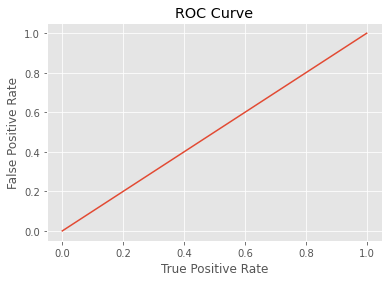

Training set areaUnderROC: 0.5


In [71]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

### Gradient Boosting Model

In [72]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=100, labelCol="readmitted",featuresCol="features")
gbtModel = gbt.fit(training)

preds_gb = gbtModel.transform(testing)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="readmitted", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(preds_gb)
print("Accuracy = %g" % accuracy)

Accuracy = 0.642123


In [73]:
pd.DataFrame(preds_gb.take(5), columns=preds_gb.columns).transpose()

,0,1,2,3,4
readmitted,0,0,0,0,0
features,"(1.0, 73.0, 18.0, 1.0, 1.0, 414.0, 411.0, 428....","(3.0, 68.0, 11.0, 1.0, 1.0, 250.1, 682.0, 459....","(1.0, 58.0, 9.0, 1.0, 1.0, 785.0, 411.0, 250.0...","(4.0, 63.0, 17.0, 1.0, 2.0, 518.0, 428.0, 425....","(1.0, 43.0, 6.0, 2.0, 1.0, 560.0, 276.0, 276.0..."
rawPrediction,"[-0.2294567089139915, 0.2294567089139915]","[-0.1970429278011346, 0.1970429278011346]","[-0.10827441399478083, 0.10827441399478083]","[-0.4273797802078455, 0.4273797802078455]","[-0.0447337593928132, 0.0447337593928132]"
probability,"[0.38724362298665493, 0.6127563770133451]","[0.40273410230287954, 0.5972658976971205]","[0.44607336208004017, 0.5539266379199599]","[0.2984353851907016, 0.7015646148092984]","[0.4776480278941515, 0.5223519721058485]"
prediction,1,1,1,1,1


### FEATURE IMPORTANCES

In [74]:
gbtModel.featureImportances

SparseVector(144, {0: 0.0407, 1: 0.0541, 2: 0.0616, 3: 0.0217, 4: 0.0565, 5: 0.0911, 6: 0.0794, 7: 0.0519, 8: 0.0275, 9: 0.0091, 10: 0.0011, 11: 0.0018, 12: 0.0086, 13: 0.0092, 14: 0.0037, 15: 0.0121, 16: 0.0081, 17: 0.0031, 18: 0.0052, 19: 0.0008, 20: 0.0029, 27: 0.003, 28: 0.0037, 29: 0.0014, 30: 0.002, 31: 0.0014, 32: 0.0011, 33: 0.0242, 34: 0.0063, 35: 0.0092, 36: 0.0072, 37: 0.0041, 38: 0.0073, 39: 0.0488, 40: 0.0058, 41: 0.0018, 42: 0.0008, 43: 0.0003, 44: 0.0057, 45: 0.0151, 46: 0.021, 47: 0.0025, 48: 0.0036, 49: 0.0021, 50: 0.0004, 54: 0.0032, 56: 0.0007, 58: 0.003, 59: 0.0021, 60: 0.0015, 61: 0.0046, 62: 0.0036, 63: 0.0022, 64: 0.0076, 66: 0.0142, 67: 0.0027, 68: 0.004, 69: 0.0036, 70: 0.0025, 71: 0.0008, 72: 0.0013, 73: 0.0012, 74: 0.0017, 75: 0.0004, 76: 0.0004, 78: 0.0002, 81: 0.0009, 82: 0.0004, 86: 0.001, 87: 0.0009, 90: 0.0006, 92: 0.0015, 104: 0.0084, 105: 0.0029, 106: 0.0029, 107: 0.0017, 108: 0.0078, 109: 0.0053, 110: 0.0065, 111: 0.006, 112: 0.0082, 113: 0.0037, 114:

### Scaling Dataset

In [75]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(output)
scaled_data = scaler_model.transform(output)


In [76]:
pd.DataFrame(scaled_data.take(5), columns=scaled_data.columns).transpose()

,0,1,2,3,4
readmitted,1,0,0,1,1
features,"(3.0, 59.0, 18.0, 0.0, 0.0, 276.0, 250.01, 255...","(2.0, 44.0, 16.0, 0.0, 0.0, 8.0, 250.43, 403.0...","(1.0, 51.0, 8.0, 0.0, 0.0, 197.0, 157.0, 250.0...","(3.0, 31.0, 16.0, 0.0, 0.0, 414.0, 411.0, 250....","(5.0, 73.0, 12.0, 0.0, 0.0, 428.0, 492.0, 250...."
scaled_features,"(1.0095397801133665, 2.987995726639875, 2.1989...","(0.6730265200755776, 2.2283357961382118, 1.954...","(0.3365132600377888, 2.5828437637056547, 0.977...","(1.0095397801133665, 1.569963856370104, 1.9546...","(1.682566300188944, 3.6970116617747606, 1.4659..."


In [77]:
# scaled_data = scaled_data.selectExpr( 'readmitted as readmitted',"scaled_features as features")

output = scaled_data
output

DataFrame[readmitted: double, features: vector, scaled_features: vector]

### Principal Component Analysis

In [78]:
from pyspark.ml.feature import PCA
pca = PCA(k=3, inputCol='scaled_features', outputCol='features_pca')
pca_model = pca.fit(output)


In [79]:
# pca_data = pca_data.selectExpr( 'readmitted as readmitted',"pcaFeature as features")
pca_data = pca_model.transform(output).select('readmitted','features_pca')
pd.DataFrame(pca_data.take(5), columns=pca_data.columns).transpose()

,0,1,2,3,4
readmitted,1,0,0,1,1
features_pca,"[4.564122110271177, 1.4876145116255661, -0.284...","[3.634299179923852, 1.0258262736774821, -0.986...","[4.021962988479493, 0.5763203518085738, -0.199...","[1.509947585851213, 0.1421744124158617, -2.817...","[3.8843580679969403, 1.65784736259487, -0.7649..."


In [80]:
pca_data = pca_data.selectExpr( 'readmitted as readmitted',"features_pca as features")


In [81]:
pd.DataFrame(pca_data.take(5), columns=pca_data.columns).transpose()

,0,1,2,3,4
readmitted,1,0,0,1,1
features,"[4.564122110271177, 1.4876145116255661, -0.284...","[3.634299179923852, 1.0258262736774821, -0.986...","[4.021962988479493, 0.5763203518085738, -0.199...","[1.509947585851213, 0.1421744124158617, -2.817...","[3.8843580679969403, 1.65784736259487, -0.7649..."


### Random Forest with PCA

In [82]:
training, testing = pca_data.randomSplit([0.8,0.2])
rf = RandomForestClassifier(numTrees=100, maxDepth=6, labelCol="readmitted", seed=42,
                           featureSubsetStrategy='onethird')
model = rf.fit(training)

predictions = model.transform(testing)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="readmitted", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(predictions)
print("Accuracy = %g" % accuracy)

Accuracy = 0.56612


### Logictic Regression with PCA

In [83]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(maxIter=100, regParam=0.3, elasticNetParam=0.8, labelCol="readmitted", 
                        featuresCol="features")
lrModel = lr.fit(training)

preds_lr = lrModel.transform(testing)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="readmitted", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(preds_lr)
print("Accuracy = %g" % accuracy)

Accuracy = 0.529861


### GBM with PCA

In [84]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=100, labelCol="readmitted",featuresCol="features")
gbtModel = gbt.fit(training)

preds_gb = gbtModel.transform(testing)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="readmitted", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(preds_gb)
print("Accuracy = %g" % accuracy)

Accuracy = 0.575157


In [85]:
import pandas as pd 
  
# initialise data of lists. 
data = {'With PCA':[0.566648, 0.537008, 0.56759], 
        'Without PCA':[0.627887, 0.529323, 0.646053]} 
  
# Creates pandas DataFrame. 
data = pd.DataFrame(data, index =['Random Forest', 
                                'Logistic Regression', 
                                'Gradient Boosting']) 
  
# print the data 
data 

,With PCA,Without PCA
Random Forest,0.566648,0.627887
Logistic Regression,0.537008,0.529323
Gradient Boosting,0.567590,0.646053


# Conclusion

As the Data is ***Sparse*** and Even due to the less correlation its been Difficult to map the features.
As we can see Even Applying **Feature Reduction** doesn't boost the Accuracy

We can Go Ahead with the **Gradient Boosting Model** as it also provides learning on weak Learners and showed better accuracy than other models

### According to GBM and Random Forest 
For the given data  Below features are classified and **Important Features**

'time_in_hospital',
 'num_lab_procedures',
 'num_medications',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'metformin_index_vector',